# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

# [作業目標]
- 依照下列提示與引導, 以幾種不同的方式, 檢視可能的離群值

# [作業重點]
- 從原始資料篩選可能的欄位, 看看那些欄位可能有離群值 (In[3], Out[3])
- 繪製目標值累積密度函數(ECDF)的圖形, 和常態分布的累積密度函數對比, 以確認是否有離群值的情形 (In[6], Out[6], In[7], Out[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

Numbers of remain columns = 73
SK_ID_CURR


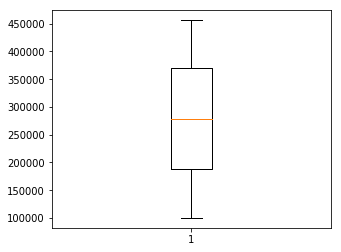

CNT_CHILDREN


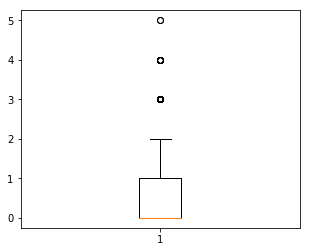

AMT_INCOME_TOTAL


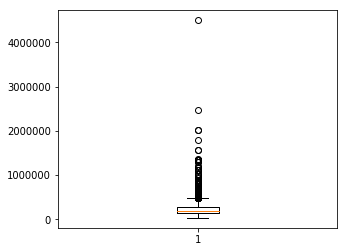

AMT_CREDIT


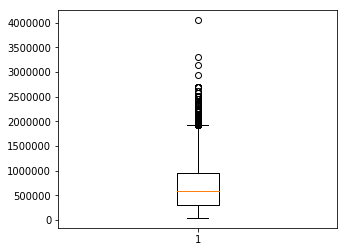

AMT_ANNUITY


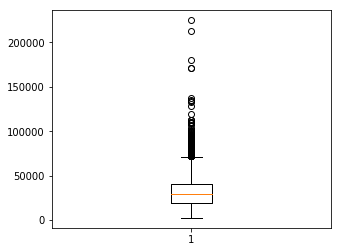

AMT_GOODS_PRICE


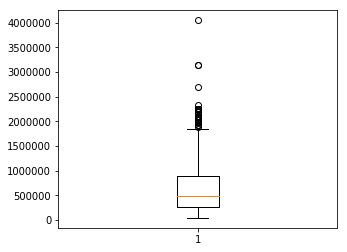

REGION_POPULATION_RELATIVE


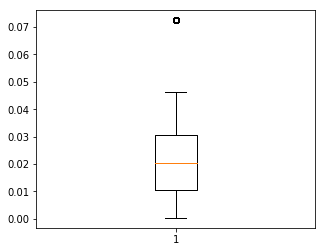

DAYS_BIRTH


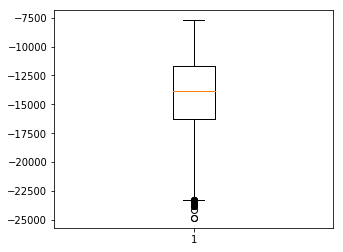

DAYS_EMPLOYED


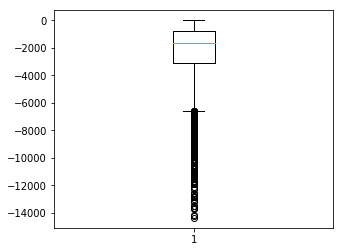

DAYS_REGISTRATION


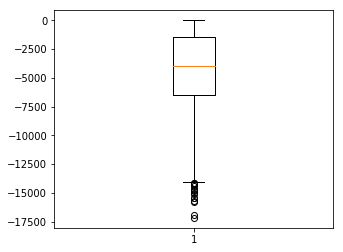

DAYS_ID_PUBLISH


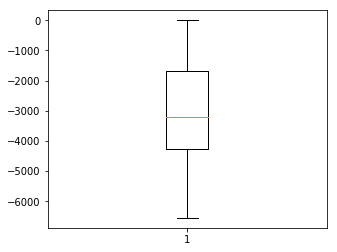

OWN_CAR_AGE


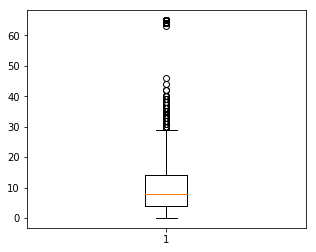

CNT_FAM_MEMBERS


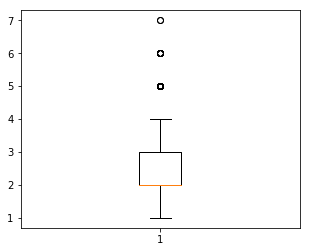

REGION_RATING_CLIENT


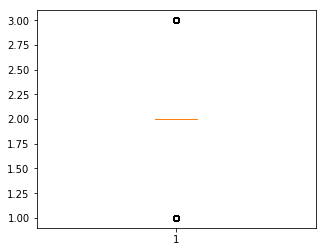

REGION_RATING_CLIENT_W_CITY


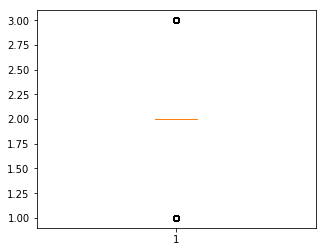

HOUR_APPR_PROCESS_START


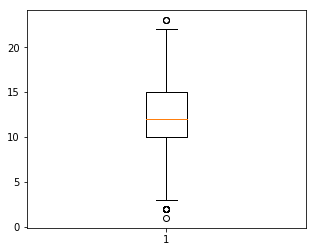

EXT_SOURCE_1


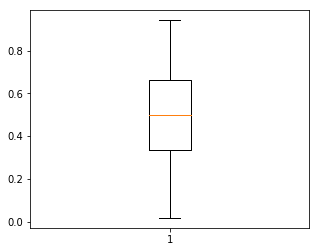

EXT_SOURCE_2


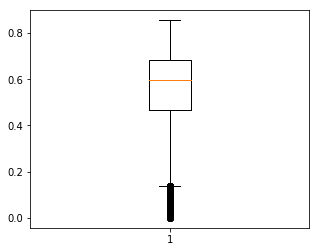

EXT_SOURCE_3


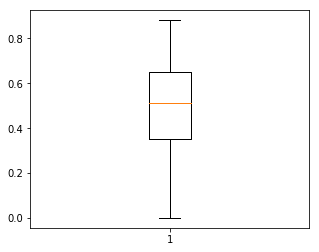

APARTMENTS_AVG


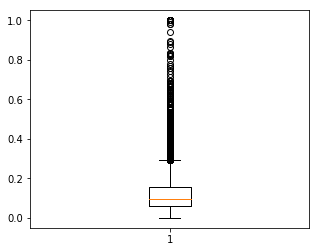

BASEMENTAREA_AVG


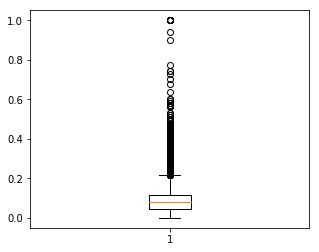

YEARS_BEGINEXPLUATATION_AVG


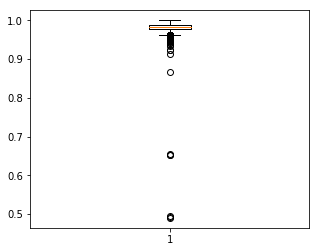

YEARS_BUILD_AVG


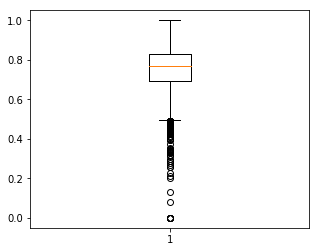

COMMONAREA_AVG


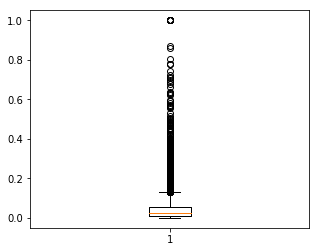

ELEVATORS_AVG


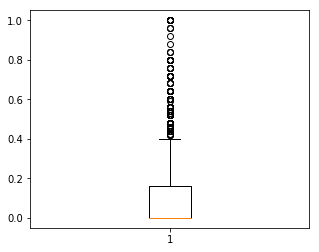

ENTRANCES_AVG


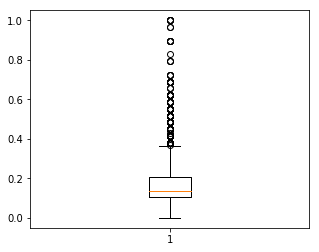

FLOORSMAX_AVG


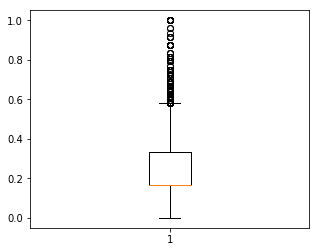

FLOORSMIN_AVG


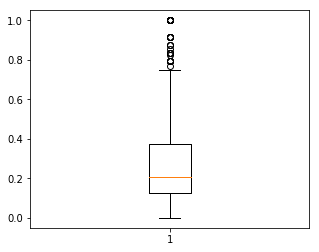

LANDAREA_AVG


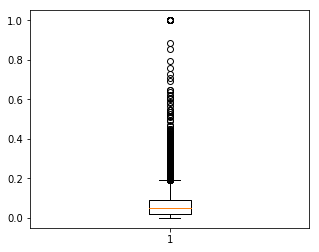

LIVINGAPARTMENTS_AVG


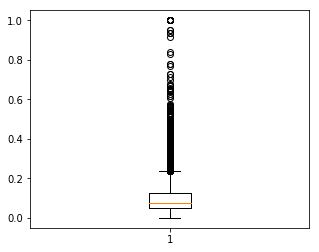

LIVINGAREA_AVG


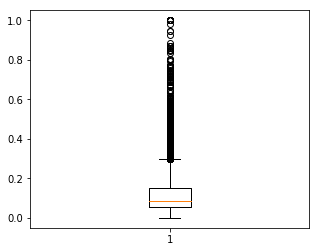

NONLIVINGAPARTMENTS_AVG


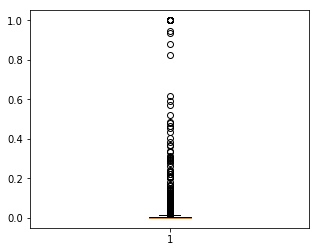

NONLIVINGAREA_AVG


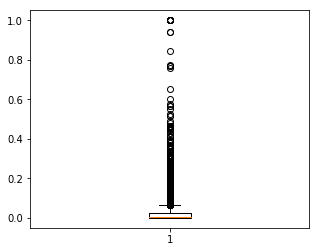

APARTMENTS_MODE


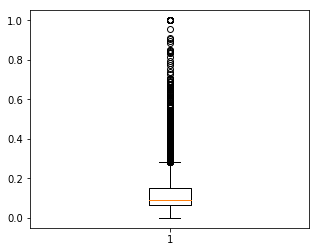

BASEMENTAREA_MODE


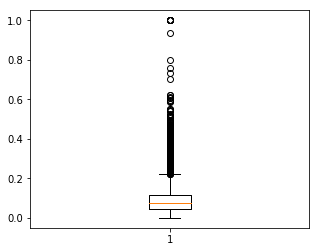

YEARS_BEGINEXPLUATATION_MODE


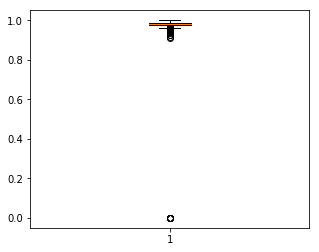

YEARS_BUILD_MODE


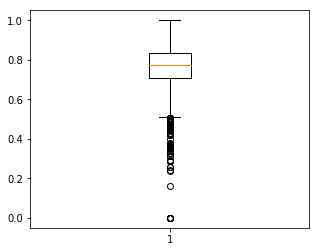

COMMONAREA_MODE


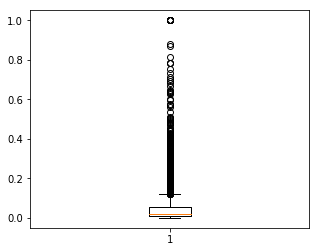

ELEVATORS_MODE


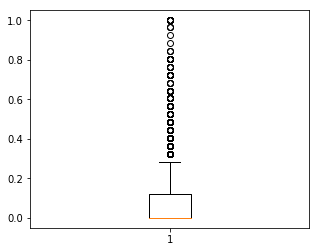

ENTRANCES_MODE


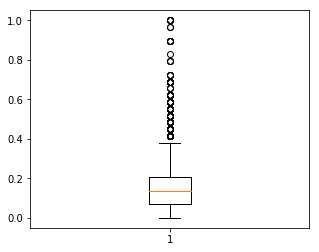

FLOORSMAX_MODE


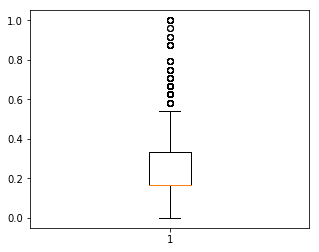

FLOORSMIN_MODE


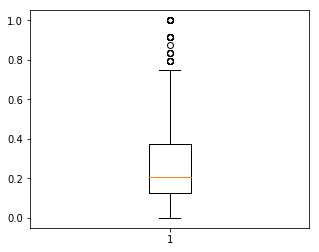

LANDAREA_MODE


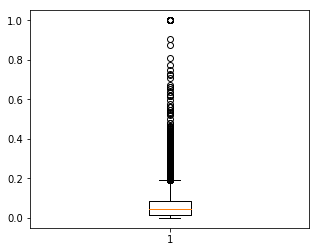

LIVINGAPARTMENTS_MODE


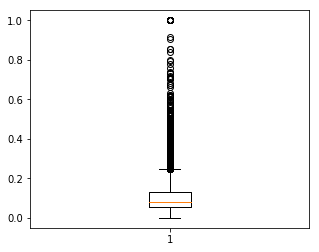

LIVINGAREA_MODE


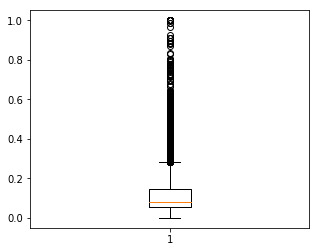

NONLIVINGAPARTMENTS_MODE


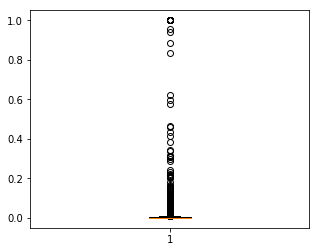

NONLIVINGAREA_MODE


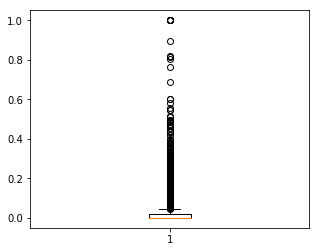

APARTMENTS_MEDI


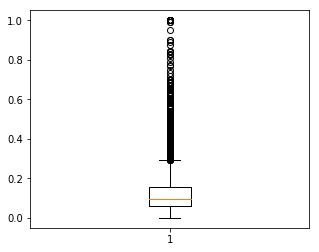

BASEMENTAREA_MEDI


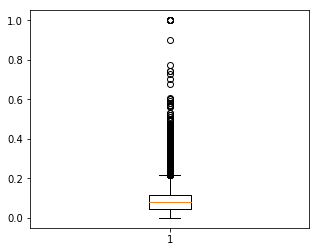

YEARS_BEGINEXPLUATATION_MEDI


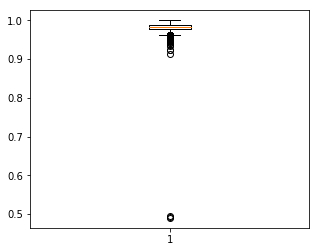

YEARS_BUILD_MEDI


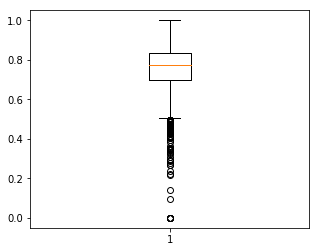

COMMONAREA_MEDI


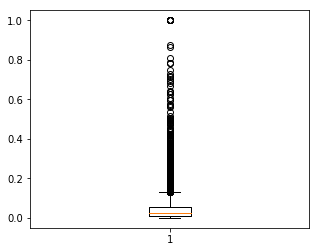

ELEVATORS_MEDI


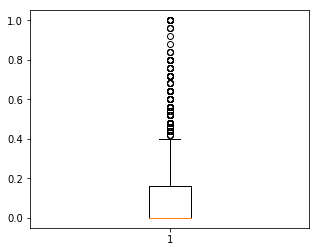

ENTRANCES_MEDI


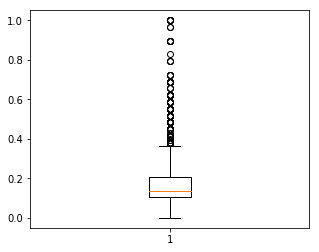

FLOORSMAX_MEDI


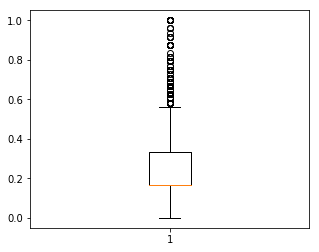

FLOORSMIN_MEDI


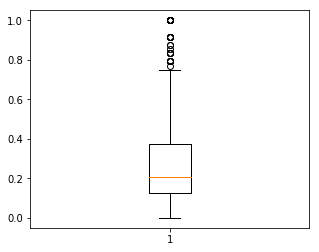

LANDAREA_MEDI


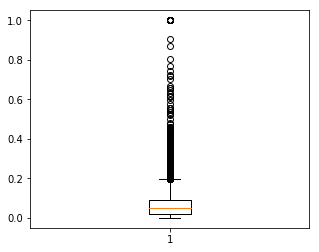

LIVINGAPARTMENTS_MEDI


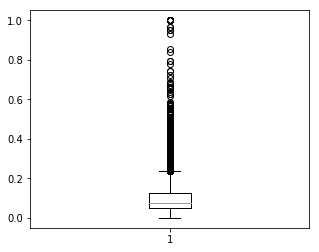

LIVINGAREA_MEDI


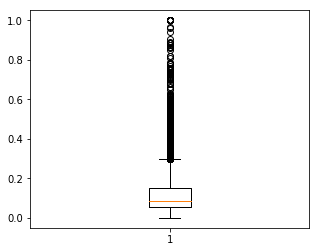

NONLIVINGAPARTMENTS_MEDI


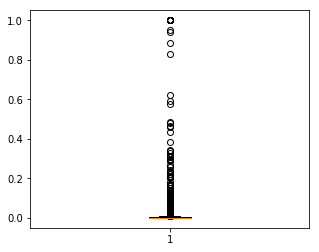

NONLIVINGAREA_MEDI


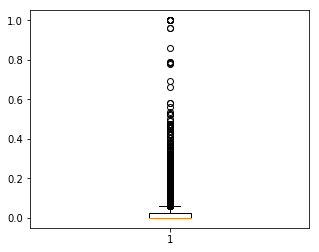

TOTALAREA_MODE


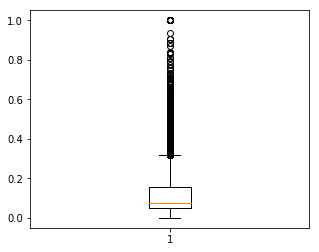

OBS_30_CNT_SOCIAL_CIRCLE


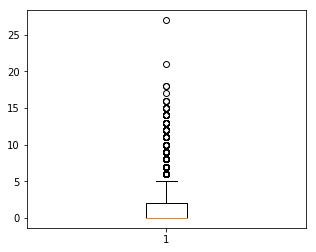

DEF_30_CNT_SOCIAL_CIRCLE


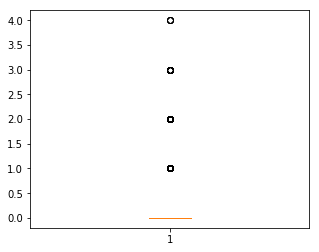

OBS_60_CNT_SOCIAL_CIRCLE


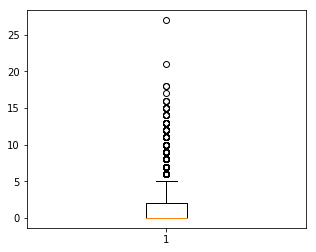

DEF_60_CNT_SOCIAL_CIRCLE


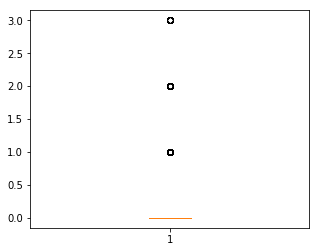

DAYS_LAST_PHONE_CHANGE


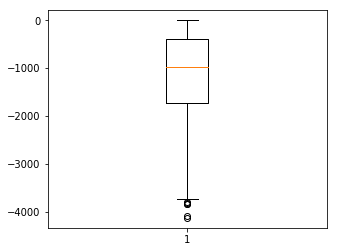

AMT_REQ_CREDIT_BUREAU_HOUR


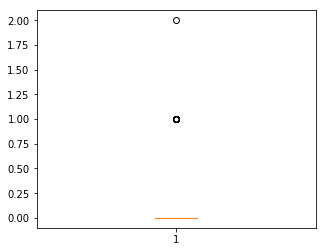

AMT_REQ_CREDIT_BUREAU_DAY


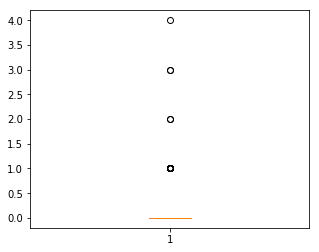

AMT_REQ_CREDIT_BUREAU_WEEK


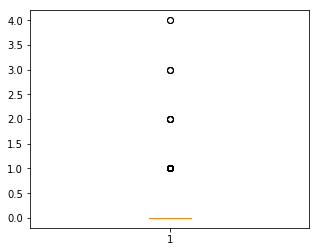

AMT_REQ_CREDIT_BUREAU_MON


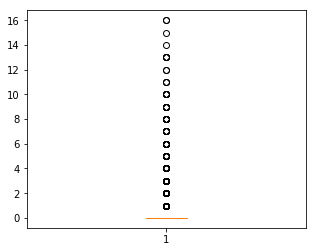

AMT_REQ_CREDIT_BUREAU_QRT


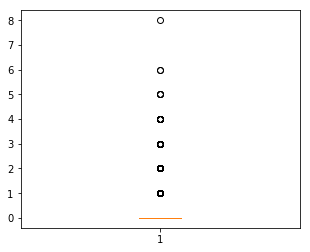

AMT_REQ_CREDIT_BUREAU_YEAR


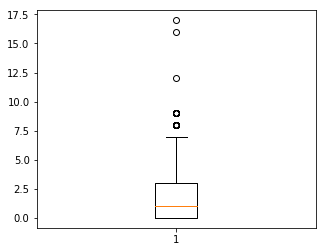

In [38]:
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""
dtype_select = ['float64', 'int64']

# 兩種寫法，試用 include 語法
#numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])
numeric_columns = list(app_train.select_dtypes(include=[np.dtype('float64'), np.dtype('int64')]).columns)

# 再把只有 2 值 (通常是 0,1) 的欄位去掉，下面的語法意義為.columns[mask]
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns =", len(numeric_columns))

app_train.dropna(inplace=True)

# 檢視這些欄位的數值範圍
for col in numeric_columns:
    """
    Your CODE HERE, make the box plot
    """
    print(col)
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.boxplot(app_train[col])
    plt.show()


### 上列有許多欄位的圖形無法顯示，因為欄位內包含NaN值


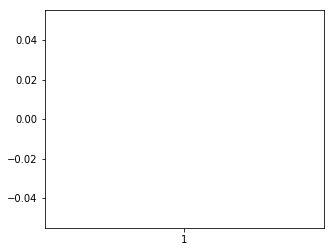

0     NaN
1     NaN
2    26.0
3     NaN
4     NaN
5     NaN
6    17.0
7     8.0
8     NaN
9     NaN
Name: OWN_CAR_AGE, dtype: float64

In [29]:
# 檢查 app_train['OWN_CAR_AGE'] 為何無法顯示 boxplot
fig, ax = plt.subplots(figsize=(5,4))
ax.boxplot(app_train['OWN_CAR_AGE'])
plt.show()
app_train['OWN_CAR_AGE'].head(10)

In [5]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
#原因: 最大值比起其他數值大的有點誇張

# DAYS_EMPLOYED
#原因: 絕大多數的數據都是負值且數值並不大，但最大值卻高達365000。認為最大值可能有問題，可能是沒有資料的欄位就被輸入365000

# OBS_60_CNT_SOCIAL_CIRCLE
#原因: 有大量數值都超出合理最大值的範圍

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

count    8.602000e+03
mean     2.228724e+05
std      1.414204e+05
min      3.375000e+04
25%      1.350000e+05
50%      1.935000e+05
75%      2.700000e+05
max      4.500000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

取 value_counts 後的結果 :(225000 那列成了新的index) 
225000.0    883
180000.0    861
135000.0    854
157500.0    748
270000.0    583
202500.0    569
112500.0    546
315000.0    377
90000.0     286
247500.0    242
Name: AMT_INCOME_TOTAL, dtype: int64



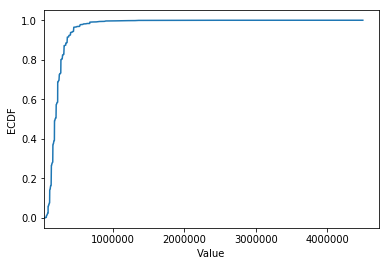

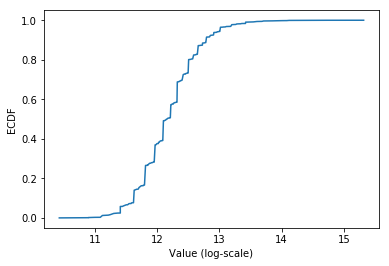

In [72]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE
"""
# value_counts 先將數值出現的次數由多到少排序，此時新的index為 'AMT_INCOME_TOTAL' 的讀值，需再用 sort_index 進行排序
# 最後用 cumsum() 計算累計值
print('\n取 value_counts 後的結果 :(225000 那列成了新的index) \n{0}\n'.format(app_train['AMT_INCOME_TOTAL'].value_counts().head(10)))
cdf = app_train['AMT_INCOME_TOTAL'].value_counts().sort_index().cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

count    8602.000000
mean        0.023543
std         0.016361
min         0.000290
25%         0.010556
50%         0.020246
75%         0.030755
max         0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


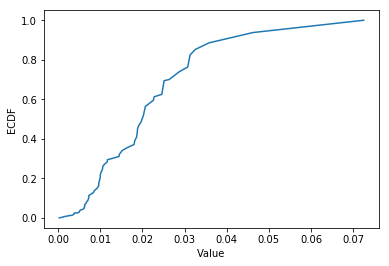

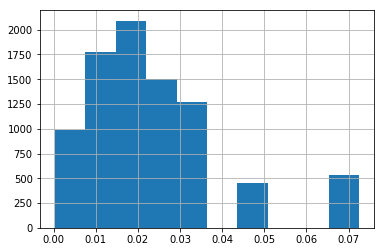

0.025164    594
0.072508    536
0.031329    527
0.046220    449
0.020713    389
0.028663    325
0.035792    287
0.020246    286
0.022625    272
0.010006    268
0.032561    236
0.018801    225
0.030755    216
0.018209    177
0.015221    176
0.019689    163
0.022800    151
0.018634    145
0.014464    142
0.016612    141
0.019101    139
0.018850    132
0.018029    118
0.010032    116
0.011657    110
0.009657    106
0.024610    103
0.010643     99
0.006305     96
0.011703     95
           ... 
0.001276     42
0.006008     42
0.006233     41
0.006852     40
0.008866     39
0.003818     38
0.006671     37
0.008575     36
0.009175     36
0.009630     33
0.005144     32
0.005313     29
0.008625     29
0.007114     27
0.005002     27
0.003541     21
0.002042     19
0.008068     19
0.002506     18
0.004960     17
0.004849     16
0.003122     13
0.005084     11
0.007120     11
0.001333     10
0.008230      5
0.001417      4
0.002134      2
0.000290      1
0.006296      1
Name: REGION_POPULATION_

In [74]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = app_train['REGION_POPULATION_RELATIVE'].value_counts().sort_index().cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    8602.000000
mean        1.352360
std         2.205177
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        27.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


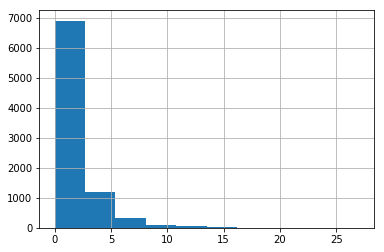

27.0       1
21.0       1
18.0       2
17.0       1
16.0       3
15.0       5
14.0       5
13.0      10
12.0      15
11.0      22
10.0      31
9.0       58
8.0       69
7.0      113
6.0      159
5.0      272
4.0      379
3.0      550
2.0      822
1.0     1488
0.0     4596
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [75]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here

cdf = app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index().cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()
"""
app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

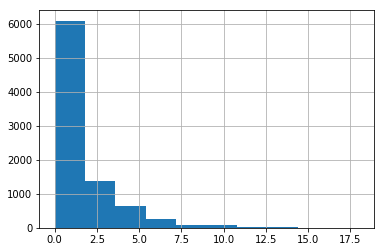

In [90]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
loc_a = app_train['OBS_60_CNT_SOCIAL_CIRCLE'] < 20
loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'

# df.loc[a, b] 的語法為  1. 'a'為 index, 'b'為 column    2. 'a' 為 mask, 'b'為 column_name
app_train.loc[loc_a, loc_b].hist()
plt.show()